## Sheavveess

In [ ]:
# The python way so then i can port to julia

In [1]:
import pysheaf as ps
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx



In [ ]:
shf=ps.Sheaf()
shf.AddCell('A',ps.Cell('real')) # First argument is the name of the Cell, the second describes the stalk
shf.AddCell('B',ps.Cell('real'))
shf.AddCell('C',ps.Cell('real'))

shf.AddCoface('A','C',ps.Coface('real','real',lambda x : (0.5 * x)))
shf.AddCoface('B','C',ps.Coface('real','real',lambda x : x))

In [ ]:
shf
pos=nx.layout.spectral_layout(shf)
nx.draw_networkx_labels(shf,pos)
nx.draw_networkx_edges(shf,pos)

In [ ]:

shf.GetCell('A').SetDataAssignment(ps.Assignment('real',1.0))
shf.GetCell('B').SetDataAssignment(ps.Assignment('real',0.0))
shf.GetCell('C').SetDataAssignment(ps.Assignment('real',0.5))

In [ ]:
shf.MaximallyExtendCell('A')
shf.MaximallyExtendCell('B')
shf.MaximallyExtendCell('C')
print(shf.ComputeConsistencyRadius())

In [ ]:

shf.GetCell('C').mDataAssignmentPresent = False
shf.ClearExtendedAssignments()

In [2]:
####
def CompareArrays(array1,array2):
    return np.average(array1-array2)

graph = ps.Sheaf()
graph.AddCell(0,ps.Cell("linear_morphism_type",CompareArrays,dataDimension = 2))
graph.AddCell(1,ps.Cell("linear_morphism_type",CompareArrays,dataDimension = 2))





In [3]:


graph.GetCell(0).SetDataAssignment(ps.Assignment("linear_morphism_type",np.array([5,6])))

#graph.GetCell(1).SetDataAssignment(ps.Assignment("linear_morphism_type",np.array([15,16])))

graph.AddCoface(0,1,ps.Coface("linear_morphism_type","linear_morphism_type",np.array([[1,0],[0,1]])))




In [10]:
graph.GetCell(0).GetLocalExtendedAssignmentValueList()

[]

In [11]:
graph1 = ps.Sheaf()

In [25]:
graph1.AddCell('A',ps.Cell('real'))
graph1.AddCell('B',ps.Cell('real'))
graph1.AddCell('C',ps.Cell('real'))


In [26]:
graph1.AddCoface('A','B',ps.Coface('real','real',lambda x : x))
graph1.AddCoface('B','C',ps.Coface('real','real',lambda x : x))


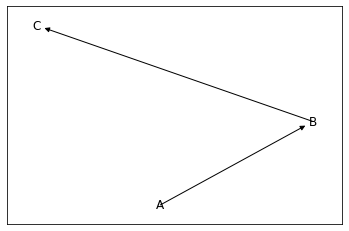

In [42]:
pos = nx.layout.spring_layout(graph1)
nx.draw_networkx_labels(graph1,pos)
nx.draw_networkx_edges(graph1,pos)

In [34]:
graph1.GetCell('A').SetDataAssignment(ps.Assignment('real',1.5))
graph1.GetCell('B').SetDataAssignment(ps.Assignment('real',1.0))
graph1.GetCell('C').SetDataAssignment(ps.Assignment('real',1.0))


In [35]:
graph1.MaximallyExtendCell('A')
graph1.MaximallyExtendCell('B')
graph1.MaximallyExtendCell('C')
print(graph1.ComputeConsistencyRadius())

0.5


In [36]:
graph1.GetCell('C').mDataAssignmentPresent = False
graph1.ClearExtendedAssignments()

In [37]:
graph1.MaximallyExtendCell('A')
graph1.MaximallyExtendCell('B')
graph1.MaximallyExtendCell('C')
print(graph1.ComputeConsistencyRadius())

0.5


In [38]:
from numpy.linalg import matrix_rank

In [41]:

pr1 = np.matrix([1,0])
pr2 = np.matrix([0,1])
restsum = np.matrix([1,1])
 
cfv0e1 = ps.SheafCoface(2,1,pr1)
cfv0e2 = ps.SheafCoface(3,1,pr2)
cfv1e1 = ps.SheafCoface(2,-1,pr1)
cfv1e2 = ps.SheafCoface(3,-1,pr2)
cfv0e3 = ps.SheafCoface(4,1,restsum)
cfv1e4 = ps.SheafCoface(5,1,restsum)

v0 = ps.SheafCell(dimension=0,id=0,stalkDim=2,name='v0',
            cofaces=[cfv0e1,cfv0e2])
v1 = ps.SheafCell(dimension=0,id=1,stalkDim=2,name='v1',
            cofaces=[cfv1e1,cfv1e2])
e1 = ps.SheafCell(dimension=1,id=2,stalkDim=1,name='e1')
e2 = ps.SheafCell(dimension=1,id=3,stalkDim=1,name='e2')
e3 = ps.SheafCell(dimension=1,id=4,stalkDim=1,name='e3')
e4 = ps.SheafCell(dimension=1,id=5,stalkDim=1,name='e4')

sheaf = ps.Sheaf([v0,v1,e1,e2,e3,e4])

AttributeError: module 'pysheaf' has no attribute 'SheafCoface'

In [73]:
def mult_by_two(x):
    return 2.0*x

def mult_by_half(x):
    return 0.5*x



shf=ps.Sheaf()

shf.AddCell('A',ps.Cell('Slata'))
shf.AddCell('B',ps.Cell('Scalar'))
shf.AddCell('C',ps.Cell('Scalar'))

shf.AddCoface('A','C',ps.Coface('Slata','Scalar',lambda x: x))
shf.AddCoface('B','C',ps.Coface('Scalar','Scalar',lambda x: x))
shf.GetCell('A').SetDataAssignment(ps.Assignment('Slata',0))
shf.GetCell('B').SetDataAssignment(ps.Assignment('Scalar',18))
shf.GetCell('C').SetDataAssignment(ps.Assignment('Scalar',0.25))

shf.mPreventRedundantExtendedAssignments=False

shf.MaximallyExtendCell('A')
shf.MaximallyExtendCell('B')
shf.MaximallyExtendCell('C')

print('Consistency radius : {}'.format(shf.ComputeConsistencyRadius()))

for thres in [0., 0.2, 0.3, 0.8]:
    print('Consistent stars at {} : {}'.format(thres,shf.ConsistentStarCollection(thres)))

Consistency radius : 17.75
Consistent stars at 0.0 : []
Consistent stars at 0.2 : ['C']
Consistent stars at 0.3 : ['A']
Consistent stars at 0.8 : ['A']


In [77]:
shf_cell = ps.Sheaf()
shf_cell.AddCell('A',ps.Cell('scalar'))
shf_cell.AddCell('B',ps.Cell('scalar'))
shf_cell.AddCell('C',ps.Cell('scalar'))

shf_cell.AddCoface('A','B',ps.Coface('scalar','scalar',mult_by_two))
shf_cell.AddCoface('B','C',ps.Coface('scalar','scalar',mult_by_half))

shf_cell.GetCell('A').SetDataAssignment(ps.Assignment('scalar',4))
shf_cell.GetCell('B').SetDataAssignment(ps.Assignment('scalar',8))
shf_cell.GetCell('C').SetDataAssignment(ps.Assignment('scalar',4))

shf_cell.mPreventRedundantExtendedAssignments=False


shf_cell.MaximallyExtendCell('A')
shf_cell.MaximallyExtendCell('B')
shf_cell.MaximallyExtendCell('C')

print('Consistency radius : {}'.format(shf_cell.ComputeConsistencyRadius()))


Consistency radius : 0.0


In [72]:
mult_by_two

NameError: name 'mult_by_two' is not defined